# Project 2: Moneyball

## Part 1: Wrangling

### Problem 1

In [29]:
import sqlite3
import pandas

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

query = "SELECT Salaries.yearID, Teams.teamID, Teams.franchID, Teams.W, sum(salary) as total_payroll, (W*1.0/G)*100 as win_percentage FROM Salaries INNER JOIN Teams ON Teams.yearID = Salaries.yearID GROUP BY Teams.teamID, Teams.yearID"

team_stats = pandas.read_sql(query, conn)
#team_stats["yearID"].sort_values().unique()
team_stats[team_stats.teamID == "WAS"]

,yearID,teamID,franchID,W,total_payroll,win_percentage
848,2005,WAS,WSN,81,2.188713e+09,50.000000
849,2006,WAS,WSN,71,2.321473e+09,43.827160
850,2007,WAS,WSN,73,2.476689e+09,45.061728
851,2008,WAS,WSN,59,2.684859e+09,36.645963
852,2009,WAS,WSN,59,2.664727e+09,36.419753
853,2010,WAS,WSN,69,2.721360e+09,42.592593
854,2011,WAS,WSN,80,2.784505e+09,49.689441
855,2012,WAS,WSN,98,2.932741e+09,60.493827
856,2013,WAS,WSN,86,3.034526e+09,53.086420
857,2014,WAS,WSN,96,3.192318e+09,59.259259


In [30]:
team_stats.head()

,yearID,teamID,franchID,W,total_payroll,win_percentage
0,1997,ANA,ANA,84,1.127286e+09,51.851852
1,1998,ANA,ANA,85,1.278283e+09,52.469136
2,1999,ANA,ANA,70,1.494229e+09,43.209877
3,2000,ANA,ANA,82,1.666135e+09,50.617284
4,2001,ANA,ANA,75,1.960663e+09,46.296296


## Part 2: Exploratory Data Analysis

## Payroll Distribution

To begin EDA, I will produce two plots displaying the relationship between the total payroll and time as well as winning percentage and total payroll. 

### Problem 2

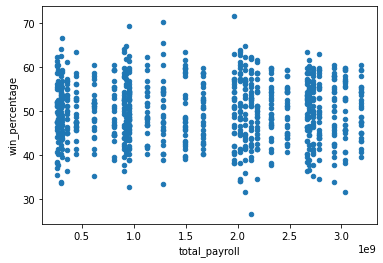

In [31]:
#Since we want to plot winning percentage as a function of total payroll, win_percentage should be on the y-axis, 
#and total_payroll on the x-axis

team_stats.plot.scatter("total_payroll", "win_percentage")

#### Question 1

### Problem 3

## Correlation Between Payroll and Winning Percentage

To further investigate the relationship between payroll and winning percentage, I will create five scatter plots of mean winning percentage vs. mean payroll for five time periods (1990-1995, 1995-2000, 2000-2005, 2005-2010, 2010-2015). To do this, I will first need to calculate the mean payroll and mean winning percentage for each year. I will then discretize the data set into the aforementioned time periods. 